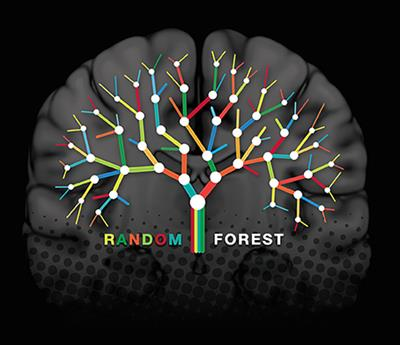

# Random Forest Regression

This notebook focuses on building a RandomForestRegressor model for cryptocurrency price prediction. It utilises historical price and volume data obtained through the CoinGecko API for a specified cryptocurrency.

The code performs the following steps:

 - Import necessary libraries such as ta, requests, numpy, pandas, plotly.graph_objs, matplotlib.pyplot, and various modules from scikit-learn.

- Define the cryptocurrency of interest and the API endpoint for retrieving the historical price data.

- Make an API request to retrieve the historical price and volume data.

- Create pandas DataFrames for closing prices and trading volume.

- Preprocess the data by converting the timestamp column to datetime format, setting the timestamp as the index, and handling missing and zero values.

- Calculate technical analysis (TA) features using the ta library, such as moving averages (SMA and EMA), relative strength index (RSI), moving average convergence divergence (MACD), and rolling statistics.

- Select the relevant features and target variable for the model.

- Split the data into training and testing sets.

- Define a pipeline that includes a column transformer for preprocessing the numerical features and a RandomForestRegressor model.

- Fit the pipeline to the training data and make predictions on the test data.

- Evaluate the model's performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R^2) score.

- Plot a learning curve to visualise the model's performance as the training set size increases.

- Create a residual plot to assess the quality of the regression model.

- Plot a histogram of residuals to examine the distribution of errors.

- Create a scatter plot to compare the predicted and actual prices.

- Visualise the feature importances using a bar plot and a 3D cube plot.

By running this code, you will gain insights into the cryptocurrency market, preprocess the data, train a RandomForestRegressor model, evaluate its performance, and analyse the importance of different features in the prediction process.

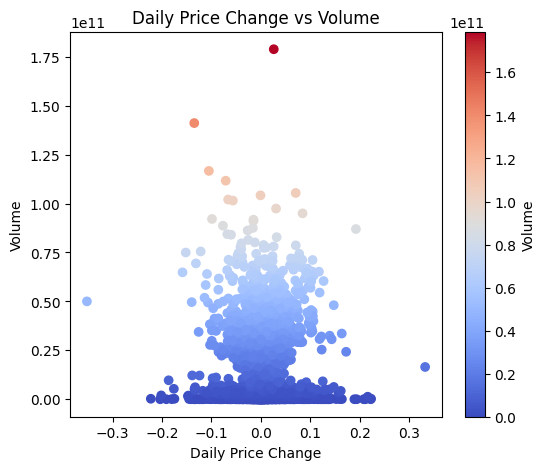


Correlation between daily price change and volume: -0.006201038252788101

Mean Squared Error (MSE): 254454.10933317133
MSE measures the average squared difference between the predicted and actual values.
A lower MSE indicates better performance.

Root Mean Squared Error (RMSE): 504.4344450304433
RMSE is the square root of the MSE and provides the error in the same unit as the target variable.
It is a popular metric as it is interpretable and directly comparable to the target variable.

Mean Absolute Error (MAE): 184.24433274417697
MAE measures the average absolute difference between the predicted and actual values.
It is less sensitive to outliers compared to MSE and provides a more robust evaluation of model performance.

R-squared (R^2) Score: 0.9989602883126095
R-squared indicates the proportion of the variance in the target variable that is predictable from the features.
A higher R-squared value (closer to 1) indicates a better fit of the model to the data.
However, R-squared shou

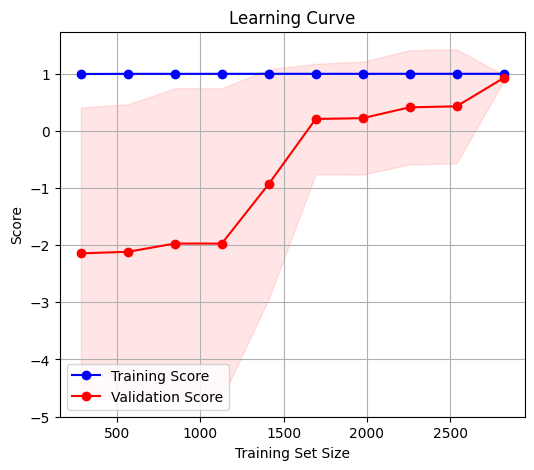


Interpreting the learning curve plot:
The learning curve plot shows the relationship between the training set size and the model's performance score.
There are two lines on the plot: the training score and the validation score.
The training score represents the model's performance on the training data as the training set size increases.
The validation score reflects the model's performance on unseen data (validation set) as the training set size increases.

Here's what to look for in the learning curve plot:
- Underfitting: Both training and validation scores are low and plateau at a similar low value.
- Overfitting: There is a significant gap between the training and validation scores, with the training score being much higher.
- Good fit: Both training and validation scores are high and converge to a similar value.
By analysing the plot, you can assess the model's bias-variance trade-off and determine if the model needs more data or adjustments.



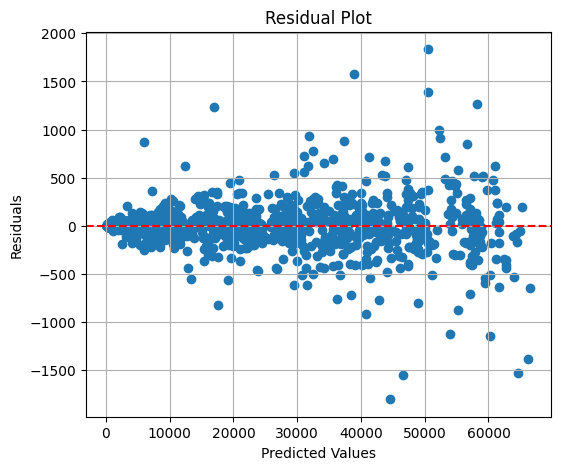


Interpreting the residual plot:
The residual plot is used to assess the quality of a regression model.

Here's what to look for in the residual plot:
- Predicted Values on the x-axis: Represents the predicted values from the regression model.
- Residuals on the y-axis: Represents the differences between the predicted values and the actual values.
- Red dashed line at y=0: Indicates the ideal scenario where the residuals are centered around zero.
By examining the residual plot, you can assess whether the residuals are randomly distributed around the y=0 line or if there are any patterns or trends.
Ideally, the residuals should be randomly scattered around the line, indicating that the model's predictions are unbiased and have constant variance.
If any patterns or trends are observed, it suggests that the model may have systematic errors or unequal spread of residuals.
In such cases, further investigation and model refinement may be necessary.



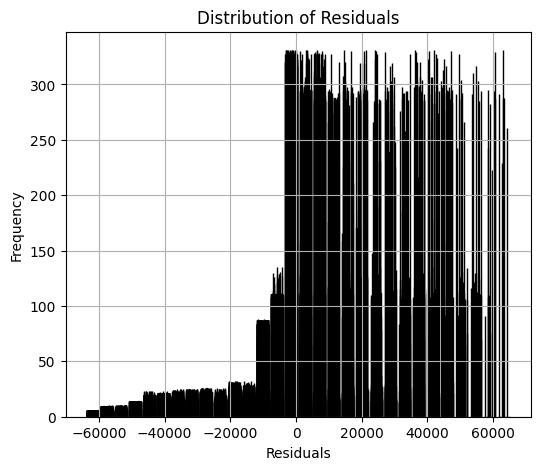


Interpreting the histogram of residuals plot:
The histogram of residuals shows the distribution of the errors or residuals of the model's predictions.
Residuals are the differences between the predicted values and the actual values.

Here's what to look for in the histogram of residuals plot:
- Normal distribution: If the residuals follow a bell-shaped curve centered around zero, it indicates that the model's predictions are unbiased.
- Skewness: If the histogram is skewed to the left or right, it suggests that the model tends to overestimate or underestimate the target variable.
- Outliers: Outliers in the histogram may indicate that the model is not capturing certain patterns or data points correctly.
By examining the histogram of residuals, you can assess the model's performance and identify any systematic patterns or anomalies in the errors.



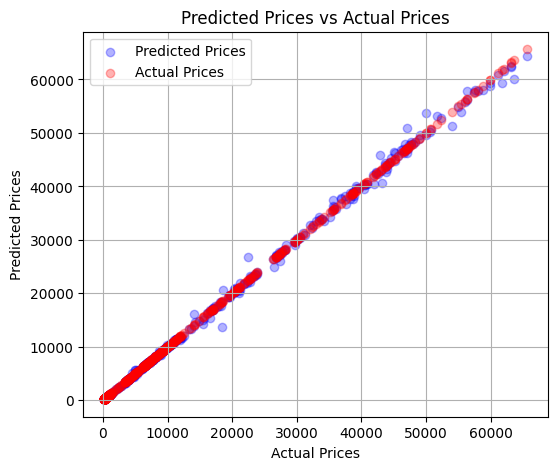


Interpreting the scatter plot of predicted and actual prices:
The scatter plot compares the predicted prices (x-axis) with the actual prices (y-axis).

Here's what to look for in the scatter plot:
- Relationship: Ideally, the data points should form a diagonal line, indicating a strong positive correlation between predicted and actual prices.
- Deviation from the line: If the data points deviate from the diagonal line, it suggests that the model's predictions differ from the actual prices.
- Spread of data points: The spread of data points around the diagonal line indicates the model's accuracy in predicting prices.
By examining the scatter plot, you can assess how well the model's predictions align with the actual prices and identify any patterns or discrepancies.



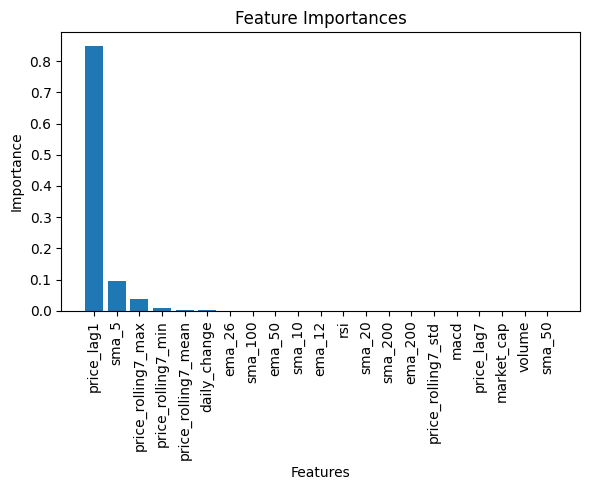


Interpreting the feature importances plot:
The feature importances plot shows the importance of each feature in the model's predictions.

Here's what to look for in the feature importances plot:
- Importance values: The height of each bar represents the importance of the corresponding feature.
- Ranking: Features are sorted in descending order based on their importance.
- Top features: The top-ranked features have the highest impact on the model's predictions.
By examining the feature importances plot, you can identify the most influential features and gain insights
into the factors driving the model's predictions.




Interpreting the feature importances plot:
The 3D cube plot provides a visual representation of feature importances.

Here's what to look for in the 3D cube plot:
- X-axis: Represents the features.
- Y-axis: Represents the index of the features.
- Z-axis: Represents the importance values of the features.
- Marker size and color: The size and color of the markers indicate the importance values.
By examining the 3D cube plot, you can visually identify the most important features based on their position and marker characteristics.
This plot provides an alternative perspective for understanding the relative importance of different features.



In [ ]:
# Import Libaries, Modules & Dependencies
import ta
import requests
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the cryptocurrency and API endpoint
crypto = 'bitcoin'  # Replace with desired coin ie: bitcoin, ethereum, stellar, algorand etc..
url = f'https://api.coingecko.com/api/v3/coins/{crypto}/market_chart'

# Define the parameters for the historical data
params = {
    'vs_currency': 'usd',  # Retrieve price data in USD
    'days': 4500,           # Retrieve data for the entire history of token available on coingecko (change as needed)
    'interval': 'daily'    # Set the interval to daily
}

# Make the API request to get the historical price data
response = requests.get(url, params=params)
data = response.json()

# Extract the price and volume data from the API response
prices = data['prices']
volumes = data['total_volumes']

# Create DataFrames for closing prices and trading volume
df_prices = pd.DataFrame(prices, columns=['timestamp', 'price'])
df_volumes = pd.DataFrame(volumes, columns=['timestamp', 'volume'])

# Convert the timestamp column to datetime format
df_prices['timestamp'] = pd.to_datetime(df_prices['timestamp'], unit='ms')
df_volumes['timestamp'] = pd.to_datetime(df_volumes['timestamp'], unit='ms')

# Set the timestamp column as the DataFrame's index
df_prices.set_index('timestamp', inplace=True)
df_volumes.set_index('timestamp', inplace=True)

# Concatenate the two DataFrames
df_combined = pd.concat([df_prices, df_volumes], axis=1)

# Calculate daily percentage change in closing prices
df_combined['daily_change'] = df_combined['price'].pct_change()

# Calculate market cap as a derived feature
df_combined['market_cap'] = df_combined['price'] * df_combined['volume']

# Handle missing values by filling them with the previous valid value
df_combined.fillna(method='ffill', inplace=True)

# Replace zero values with a small non-zero value (e.g., 1e-8)
df_combined.replace(0, 1e-8, inplace=True)

# Calculate technical analysis (TA) features
df_combined['sma_5'] = ta.trend.sma_indicator(df_combined['price'], window=5)
df_combined['sma_10'] = ta.trend.sma_indicator(df_combined['price'], window=10)
df_combined['sma_20'] = ta.trend.sma_indicator(df_combined['price'], window=20)
df_combined['sma_50'] = ta.trend.sma_indicator(df_combined['price'], window=50)
df_combined['sma_100'] = ta.trend.sma_indicator(df_combined['price'], window=100)
df_combined['sma_200'] = ta.trend.sma_indicator(df_combined['price'], window=200)
df_combined['ema_12'] = ta.trend.ema_indicator(df_combined['price'], window=12)
df_combined['ema_26'] = ta.trend.ema_indicator(df_combined['price'], window=26)
df_combined['ema_50'] = ta.trend.ema_indicator(df_combined['price'], window=50)
df_combined['ema_200'] = ta.trend.ema_indicator(df_combined['price'], window=200)
df_combined['rsi'] = ta.momentum.rsi(df_combined['price'])
df_combined['macd'] = ta.trend.macd(df_combined['price'])
df_combined['price_lag1'] = df_combined['price'].shift(1)
df_combined['price_lag7'] = df_combined['price'].shift(7)
df_combined['price_rolling7_mean'] = df_combined['price'].rolling(window=7, min_periods=1).mean()
df_combined['price_rolling7_min'] = df_combined['price'].rolling(window=7, min_periods=1).min()
df_combined['price_rolling7_max'] = df_combined['price'].rolling(window=7, min_periods=1).max()
df_combined['price_rolling7_std'] = df_combined['price'].rolling(window=7, min_periods=1).std()

# Select the columns of interest
selected_columns = ['price', 'daily_change', 'market_cap', 'volume', 'sma_5', 'sma_10', 'sma_20', 'sma_50', 'sma_100', 'sma_200', 'ema_12',
                    'ema_26', 'ema_50', 'ema_200', 'rsi', 'macd', 'price_lag1', 'price_lag7',
                    'price_rolling7_mean', 'price_rolling7_min', 'price_rolling7_max', 'price_rolling7_std']
df_selected = df_combined[selected_columns]

# Visualise Daily Price Change vs Volume with different colors
plt.figure(figsize=(6, 5))
plt.scatter(df_selected['daily_change'], df_selected['volume'], c=df_selected['volume'], cmap='coolwarm')
plt.xlabel('Daily Price Change')
plt.ylabel('Volume')
plt.title('Daily Price Change vs Volume')
plt.colorbar(label='Volume')
plt.show()

# Calculate the correlation of the 'daily change' & 'volume' using the .corr() function
correlation = df_selected['daily_change'].corr(df_selected['volume'])
# Print the correlation
print(f'\nCorrelation between daily price change and volume: {correlation}\n')

features = ['daily_change', 'market_cap', 'volume', 'sma_5', 'sma_10', 'sma_20', 'sma_50', 'sma_100', 'sma_200', 'ema_12','ema_26',
            'ema_50', 'ema_200', 'rsi', 'macd', 'price_lag1', 'price_lag7', 'price_rolling7_mean', 'price_rolling7_min', 'price_rolling7_max',
            'price_rolling7_std']
target = ['price']

# Copy the DataFrame to avoid the SettingWithCopyWarning
df_selected = df_selected.dropna().copy()

# Split the data into features (X) and target (y)
X = df_selected[features]
y = df_selected[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)  # Scale numerical features
    ])

# Define the random forest regressor model
model = RandomForestRegressor(random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to convert y to a 1D array

# Predict the target variable on the test data
y_pred = pipeline.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("MSE measures the average squared difference between the predicted and actual values.")
print("A lower MSE indicates better performance.")

# Calculate RMSE
rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error (RMSE):", rmse)
print("RMSE is the square root of the MSE and provides the error in the same unit as the target variable.")
print("It is a popular metric as it is interpretable and directly comparable to the target variable.")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error (MAE):", mae)
print("MAE measures the average absolute difference between the predicted and actual values.")
print("It is less sensitive to outliers compared to MSE and provides a more robust evaluation of model performance.")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("\nR-squared (R^2) Score:", r2)
print("R-squared indicates the proportion of the variance in the target variable that is predictable from the features.")
print("A higher R-squared value (closer to 1) indicates a better fit of the model to the data.")
print("However, R-squared should be interpreted carefully as it can be inflated by adding more features.\n")

# Define the learning curve function
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calculate mean and standard deviation of train scores and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(6, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    print("\nInterpreting the learning curve plot:")
    print("The learning curve plot shows the relationship between the training set size and the model's performance score.")
    print("There are two lines on the plot: the training score and the validation score.")
    print("The training score represents the model's performance on the training data as the training set size increases.")
    print("The validation score reflects the model's performance on unseen data (validation set) as the training set size increases.\n")
    print("Here's what to look for in the learning curve plot:")
    print("- Underfitting: Both training and validation scores are low and plateau at a similar low value.")
    print("- Overfitting: There is a significant gap between the training and validation scores, with the training score being much higher.")
    print("- Good fit: Both training and validation scores are high and converge to a similar value.")
    print("By analysing the plot, you can assess the model's bias-variance trade-off and determine if the model needs more data or adjustments.\n")

# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Reshape the target variable into a 1D array
y = y.values.ravel()

# Plot the learning curve
plot_learning_curve(pipeline, X, y, cv=5, train_sizes=train_sizes)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Calculate the residuals
residuals = y_train_pred - y_train.values.ravel()

# Create a residual plot
plt.figure(figsize=(6, 5))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

print("\nInterpreting the residual plot:")
print("The residual plot is used to assess the quality of a regression model.")
print("\nHere's what to look for in the residual plot:")
print("- Predicted Values on the x-axis: Represents the predicted values from the regression model.")
print("- Residuals on the y-axis: Represents the differences between the predicted values and the actual values.")
print("- Red dashed line at y=0: Indicates the ideal scenario where the residuals are centered around zero.")
print("By examining the residual plot, you can assess whether the residuals are randomly distributed around the y=0 line or if there are any patterns or trends.")
print("Ideally, the residuals should be randomly scattered around the line, indicating that the model's predictions are unbiased and have constant variance.")
print("If any patterns or trends are observed, it suggests that the model may have systematic errors or unequal spread of residuals.")
print("In such cases, further investigation and model refinement may be necessary.\n")

# Calculate the residuals
residuals = y_test.values.ravel() - y_pred.reshape(-1, 1)

# Plot the histogram of residuals
plt.figure(figsize=(6, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

print("\nInterpreting the histogram of residuals plot:")
print("The histogram of residuals shows the distribution of the errors or residuals of the model's predictions.")
print("Residuals are the differences between the predicted values and the actual values.\n")
print("Here's what to look for in the histogram of residuals plot:")
print("- Normal distribution: If the residuals follow a bell-shaped curve centered around zero, it indicates that the model's predictions are unbiased.")
print("- Skewness: If the histogram is skewed to the left or right, it suggests that the model tends to overestimate or underestimate the target variable.")
print("- Outliers: Outliers in the histogram may indicate that the model is not capturing certain patterns or data points correctly.")
print("By examining the histogram of residuals, you can assess the model's performance and identify any systematic patterns or anomalies in the errors.\n")

# Create a scatter plot to compare the predicted and actual prices
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='blue', alpha=0.3, label='Predicted Prices')
plt.scatter(y_test, y_test, c='red', alpha=0.3, label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Prices vs Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

print("\nInterpreting the scatter plot of predicted and actual prices:")
print("The scatter plot compares the predicted prices (x-axis) with the actual prices (y-axis).")
print("\nHere's what to look for in the scatter plot:")
print("- Relationship: Ideally, the data points should form a diagonal line, indicating a strong positive correlation between predicted and actual prices.")
print("- Deviation from the line: If the data points deviate from the diagonal line, it suggests that the model's predictions differ from the actual prices.")
print("- Spread of data points: The spread of data points around the diagonal line indicates the model's accuracy in predicting prices.")
print("By examining the scatter plot, you can assess how well the model's predictions align with the actual prices and identify any patterns or discrepancies.\n")

# Get feature importances from the trained model
importances = pipeline.named_steps['model'].feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(6, 5))
plt.bar(range(len(importances)), sorted_importances)
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

print("\nInterpreting the feature importances plot:")
print("The feature importances plot shows the importance of each feature in the model's predictions.")
print("\nHere's what to look for in the feature importances plot:")
print("- Importance values: The height of each bar represents the importance of the corresponding feature.")
print("- Ranking: Features are sorted in descending order based on their importance.")
print("- Top features: The top-ranked features have the highest impact on the model's predictions.")
print("By examining the feature importances plot, you can identify the most influential features and gain insights")
print("into the factors driving the model's predictions.\n")

# Calculate feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances as a 3D cube plot
fig = go.Figure(data=[go.Scatter3d(
    x=importance_df['Feature'],
    y=importance_df.index,
    z=importance_df['Importance'],
    mode='markers',
    marker=dict(
        size=6,
        color=importance_df['Importance'],
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='Feature',
    yaxis_title='Index',
    zaxis_title='Importance'
))
fig.update_layout(title='Feature Importances - 3D Cube Plot')
fig.show()

print("\nInterpreting the feature importances plot:")
print("The 3D cube plot provides a visual representation of feature importances.")
print("\nHere's what to look for in the 3D cube plot:")
print("- X-axis: Represents the features.")
print("- Y-axis: Represents the index of the features.")
print("- Z-axis: Represents the importance values of the features.")
print("- Marker size and color: The size and color of the markers indicate the importance values.")
print("By examining the 3D cube plot, you can visually identify the most important features based on their position and marker characteristics.")
print("This plot provides an alternative perspective for understanding the relative importance of different features.\n")